<a href="https://colab.research.google.com/github/greyweb/Model-Interpretability-SHAP/blob/main/SHAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install shap
!pip install tensorflow==2.5.0

In [2]:
import json
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
import shap

In [3]:
# load pre-trained model and data
model = ResNet50(weights='imagenet')
X, y = shap.datasets.imagenet50()

102973440/102967424 [==============================] - 2s 0us/step


In [4]:
# getting ImageNet 1000 class names
url = "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"
with open(shap.datasets.cache(url)) as file:
    class_names = [v[1] for v in json.load(file).values()]
#print("Number of ImageNet classes:", len(class_names))
#print("Class names:", class_names)

In [5]:
# python function to get model output; replace this function with your own model function.
def f(x):
    tmp = x.copy()
    preprocess_input(tmp)
    return model(tmp)

# define a masker that is used to mask out partitions of the input image.
masker = shap.maskers.Image("inpaint_telea", X[0].shape)

# create an explainer with model and image masker
explainer = shap.Explainer(f, masker, output_names=class_names)

# here we explain two images using 500 evaluations of the underlying model to estimate the SHAP values
shap_values = explainer(X[1:3], max_evals=100, batch_size=50, outputs=shap.Explanation.argsort.flip[:4])

  0%|          | 0/48 [00:00<?, ?it/s]

Partition explainer:  50%|█████     | 1/2 [00:00<?, ?it/s]

  0%|          | 0/48 [00:00<?, ?it/s]

Partition explainer: 3it [00:50, 25.07s/it]


In [6]:
shap_values.shape


(2, 224, 224, 3, 4)

In [7]:
import numpy as np
np.tile(np.array(shap_values.output_names), 2)

array([['American_egret', 'crane', 'little_blue_heron', 'flamingo',
        'American_egret', 'crane', 'little_blue_heron', 'flamingo'],
       ['speedboat', 'fountain', 'lifeboat', 'snowplow', 'speedboat',
        'fountain', 'lifeboat', 'snowplow']], dtype='<U30')

In [8]:
np.array(shap_values.output_names).shape[0]

2

In [10]:
shap_values.values

array([[[[[ 8.16397701e-07, -2.66276986e-07, -3.96991618e-07,
            3.64668879e-07],
          [ 8.16397701e-07, -2.66276986e-07, -3.96991618e-07,
            3.64668879e-07],
          [ 8.16397701e-07, -2.66276986e-07, -3.96991618e-07,
            3.64668879e-07]],

         [[ 8.16397701e-07, -2.66276986e-07, -3.96991618e-07,
            3.64668879e-07],
          [ 8.16397701e-07, -2.66276986e-07, -3.96991618e-07,
            3.64668879e-07],
          [ 8.16397701e-07, -2.66276986e-07, -3.96991618e-07,
            3.64668879e-07]],

         [[ 8.16397701e-07, -2.66276986e-07, -3.96991618e-07,
            3.64668879e-07],
          [ 8.16397701e-07, -2.66276986e-07, -3.96991618e-07,
            3.64668879e-07],
          [ 8.16397701e-07, -2.66276986e-07, -3.96991618e-07,
            3.64668879e-07]],

         ...,

         [[ 2.86809377e-06,  3.10447784e-06, -5.35081873e-07,
            4.23350510e-07],
          [ 2.86809377e-06,  3.10447784e-06, -5.35081873e-07,
       

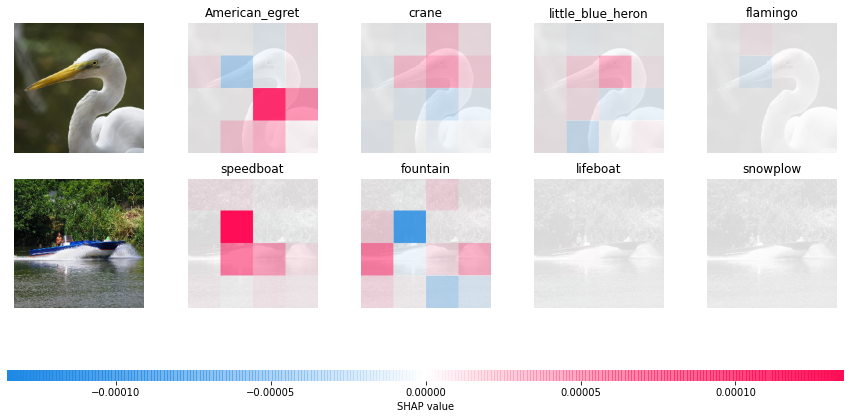

In [11]:
# output with shap values
shap.image_plot(shap_values)

In [12]:
shap_values[0].base_values.shape

(4,)

In [15]:
shap_values.base_values

array([[3.98265285e-04, 4.48955434e-05, 5.20897775e-05, 2.04479657e-04],
       [3.84933199e-04, 2.62791174e-04, 1.99120477e-05, 5.09578276e-05]])

In [14]:
shap_values.output_names

array([['American_egret', 'crane', 'little_blue_heron', 'flamingo'],
       ['speedboat', 'fountain', 'lifeboat', 'snowplow']], dtype='<U30')

In [16]:
# python function to get model output; replace this function with your own model function.
def f(x):
    tmp = x.copy()
    preprocess_input(tmp)
    return model(tmp)

# define a masker that is used to mask out partitions of the input image.
masker_blur = shap.maskers.Image("blur(128,128)", X[0].shape)

# create an explainer with model and image masker
explainer_blur = shap.Explainer(f, masker_blur, output_names=class_names)

# here we explain two images using 500 evaluations of the underlying model to estimate the SHAP values
shap_values_fine = explainer_blur(X[1:3], max_evals=5000, batch_size=50, outputs=shap.Explanation.argsort.flip[:4])

  0%|          | 0/2498 [00:00<?, ?it/s]

Partition explainer:  50%|█████     | 1/2 [00:00<?, ?it/s]

  0%|          | 0/2498 [00:00<?, ?it/s]

Partition explainer: 3it [16:54, 507.25s/it]


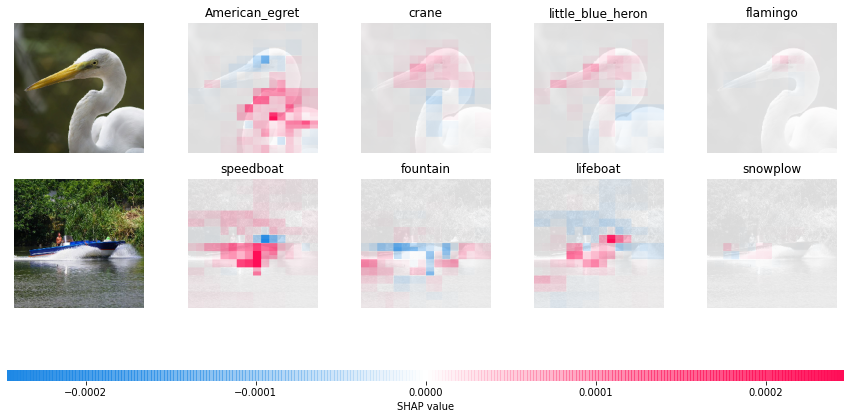

In [17]:
shap.image_plot(shap_values_fine)